In [27]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from io import BytesIO

In [2]:
# def create_image_df(folder_path, is_positive):
#     # List to store file names and images
#     file_data = []
    
#     # Loop through all files in the folder
#     for file in os.listdir(folder_path):
#         # Check if the file is an image file
#         if file.endswith(('.jpg', '.jpeg', '.png', '.gif')):
#             # Open the image file
#             image_path = os.path.join(folder_path, file)
#             if is_positive:
#                 if 'bacteria' in file:
#                     y_val = 'bacteria'
#                 elif 'virus' in file:
#                     y_val = 'virus'
#                 else:
#                     y_val = 'pneumonia'
#             else:
#                 y_val = 'normal'
#             with Image.open(image_path) as image:
#                 # Convert to grayscale
#                 if image.mode != 'L':
#                                 grayscale_image = image.convert('L')
#                 # Save the image to a byte array
#                 img_byte_arr = BytesIO()
#                 image.save(img_byte_arr, format=image.format)
#                 img_byte_arr = img_byte_arr.getvalue()
#                 # Append the file name and image to the list
#                 file_data.append({'File_Name': file, 'Image': img_byte_arr, 'y_val': y_val})
    
#     # Create a DataFrame from the list of dictionaries
#     return pd.DataFrame(file_data)

In [54]:
def create_image_df(folder_path, is_positive, target_size=(512, 512)):
    def resize_with_padding(img, target_size):
        # Resize the image while keeping the aspect ratio
        img.thumbnail(target_size)
        # Create a new image with the target size and a white background
        new_img = Image.new("L", target_size, color=255)  # color for white background
        # Paste the resized image onto the new image, centered
        new_img.paste(img, ((target_size[0] - img.size[0]) // 2, (target_size[1] - img.size[1]) // 2))
        img_arr = np.array(new_img) / 255.0  # Normalize pixel values
        img_arr = np.expand_dims(img_arr, axis=0)  # Add batch dimension
        img_arr = np.expand_dims(img_arr, axis=-1)  # Add channel dimension for grayscale
        return new_img, img_arr
    
    # List to store file names and images
    file_data = []
    
    # Loop through all files in the folder
    for file in os.listdir(folder_path):
        # Check if the file is an image file
        if file.endswith(('.jpg', '.jpeg', '.png', '.gif')):
            # Open the image file
            image_path = os.path.join(folder_path, file)
            if is_positive:
                if 'bacteria' in file:
                    y_val = 'bacteria'
                elif 'virus' in file:
                    y_val = 'virus'
                else:
                    y_val = 'pneumonia'
            else:
                y_val = 'normal'
            with Image.open(image_path) as image:
                # Convert to grayscale
                if image.mode != 'L':
                    grayscale_image = image.convert('L')
                image, image_arr = resize_with_padding(image, target_size)
                # Save the image to a byte array
                img_byte_arr = BytesIO()
                image.save(img_byte_arr, format='JPEG')
                img_byte_arr = img_byte_arr.getvalue()
                # Append the file name and image to the list
                file_data.append({'File_Name': file, 'Image': img_byte_arr, 'Array': image_arr, 'y_val': y_val})
    
    # Create a DataFrame from the list of dictionaries
    return pd.DataFrame(file_data)



In [55]:
normal_test_df = create_image_df('./test/NORMAL', False)
pneumonia_test_df = create_image_df('./test/PNEUMONIA', True)
normal_train_df = create_image_df('./train/NORMAL', False)
pneumonia_train_df = create_image_df('./train/PNEUMONIA', True)
normal_val_df = create_image_df('./val/NORMAL', False)
pneumonia_val_df = create_image_df('./val/PNEUMONIA', True)

normal_train_df

,File_Name,Image,Array,y_val
0,IM-0115-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
1,IM-0117-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
2,IM-0119-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
3,IM-0122-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
4,IM-0125-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
...,...,...,...,...
1336,NORMAL2-IM-1406-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
1337,NORMAL2-IM-1412-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
1338,NORMAL2-IM-1419-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
1339,NORMAL2-IM-1422-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal


In [56]:
pneumonia_train_df

,File_Name,Image,Array,y_val
0,person1000_bacteria_2931.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria
1,person1000_virus_1681.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",virus
2,person1001_bacteria_2932.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria
3,person1002_bacteria_2933.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria
4,person1003_bacteria_2934.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria
...,...,...,...,...
3870,person99_virus_183.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",virus
3871,person9_bacteria_38.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria
3872,person9_bacteria_39.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria
3873,person9_bacteria_40.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria


In [57]:
pneumonia_val_df['y_val'].value_counts()

y_val
bacteria    8
Name: count, dtype: int64

In [58]:
pneumonia_train_df['y_val'].value_counts()

y_val
bacteria    2530
virus       1345
Name: count, dtype: int64

In [59]:
train_df = pd.concat([normal_train_df, pneumonia_train_df], ignore_index=True)
train_df

,File_Name,Image,Array,y_val
0,IM-0115-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
1,IM-0117-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
2,IM-0119-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
3,IM-0122-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
4,IM-0125-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
...,...,...,...,...
5211,person99_virus_183.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",virus
5212,person9_bacteria_38.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria
5213,person9_bacteria_39.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria
5214,person9_bacteria_40.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria


In [60]:
test_df = pd.concat([normal_test_df, pneumonia_test_df], ignore_index=True)
test_df

,File_Name,Image,Array,y_val
0,IM-0001-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
1,IM-0003-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
2,IM-0005-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
3,IM-0006-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
4,IM-0007-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
...,...,...,...,...
619,person96_bacteria_465.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria
620,person96_bacteria_466.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria
621,person97_bacteria_468.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria
622,person99_bacteria_473.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria


In [61]:
val_df = pd.concat([normal_val_df, pneumonia_val_df], ignore_index=True)
val_df

,File_Name,Image,Array,y_val
0,NORMAL2-IM-1427-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
1,NORMAL2-IM-1430-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
2,NORMAL2-IM-1431-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
3,NORMAL2-IM-1436-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
4,NORMAL2-IM-1437-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
5,NORMAL2-IM-1438-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
6,NORMAL2-IM-1440-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
7,NORMAL2-IM-1442-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",normal
8,person1946_bacteria_4874.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria
9,person1946_bacteria_4875.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",bacteria


In [62]:
y_train = train_df['y_val']
X_train = train_df[['Image', 'Array']]
y_test = test_df['y_val']
X_test = test_df[['Image', 'Array']]
y_val = val_df['y_val']
X_val = val_df[['Image', 'Array']]

In [63]:
y_train

0         normal
1         normal
2         normal
3         normal
4         normal
          ...   
5211       virus
5212    bacteria
5213    bacteria
5214    bacteria
5215    bacteria
Name: y_val, Length: 5216, dtype: object

In [64]:
X_train

,Image,Array
0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [..."
1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [..."
2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [..."
3,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [..."
4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [..."
...,...,...
5211,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [..."
5212,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [..."
5213,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [..."
5214,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [..."


In [75]:
X_train['Array'][12][0][0]

array([[1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.53333333],
       [0.54117647],
       [0.52941176],
       [0.49803922],
       [0.49019608],
       [0.46666667],
       [0.45490196],
       [0.41960784],
       [0.37254902],
       [0.31764706],
       [0.27843137],
       [0.2627451 ],
       [0.2627451 ],
       [0.25098039],
       [0.24705882],
       [0.28627451],
       [0.29019608],
       [0.28235294],
       [0.28235294],
       [0.27058824],
       [0.25882353],
       [0.23529412],
       [0.21568627],
       [0.22745098],
       [0.20392157],
       [0.20784314],
       [0.21176471],
       [0.19607843],
       [0.18431373],
       [0.19607843],
       [0.207

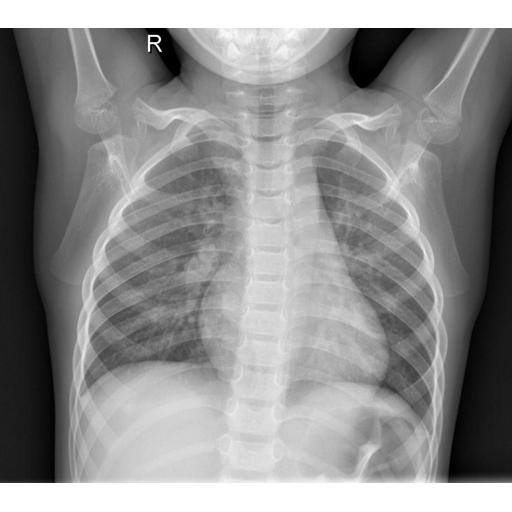

In [73]:
img_byte_arr = X_train['Image'][0]
img = Image.open(BytesIO(img_byte_arr))
display(img)

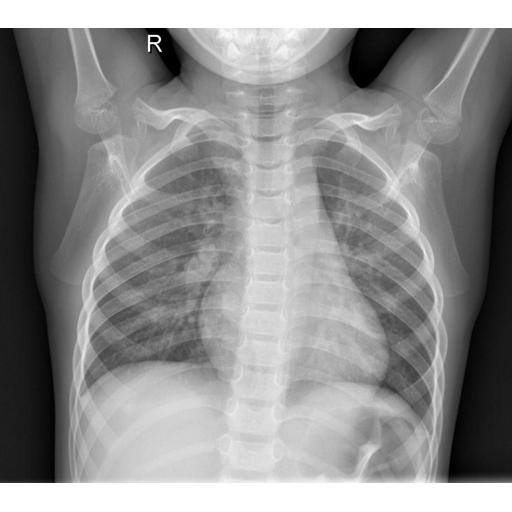

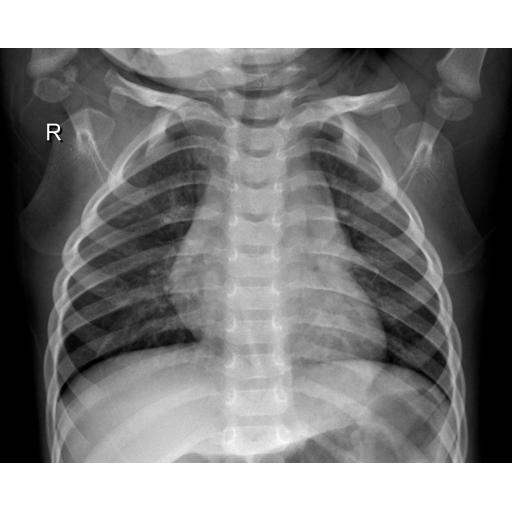

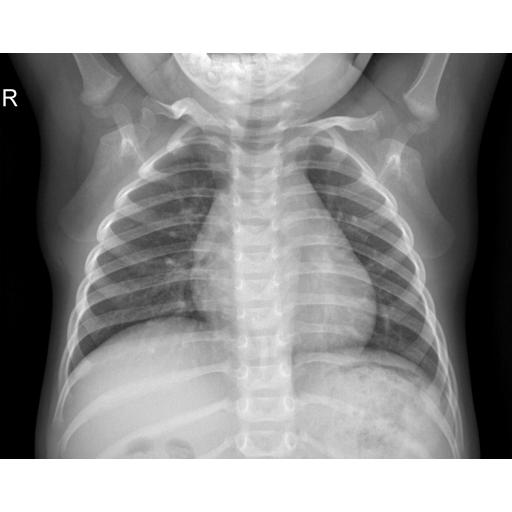

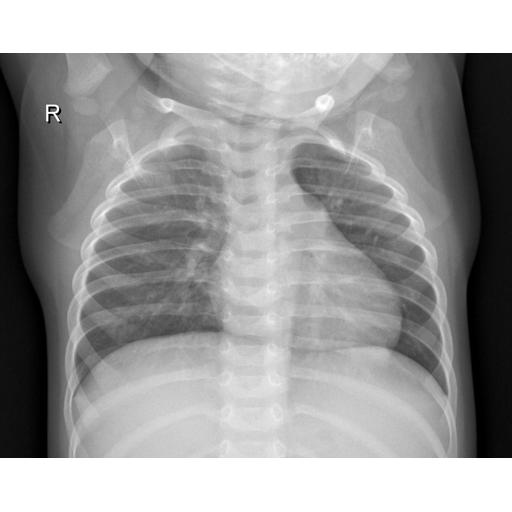

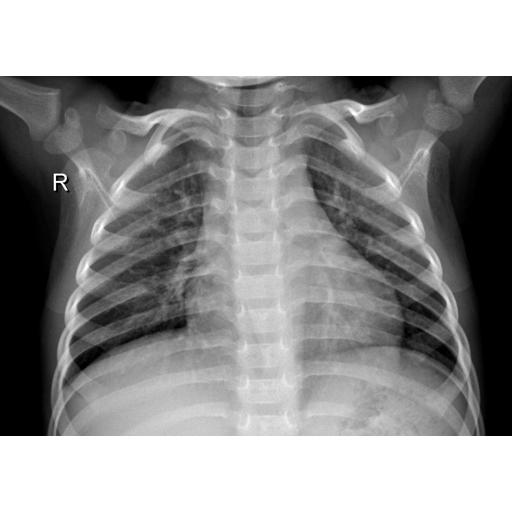

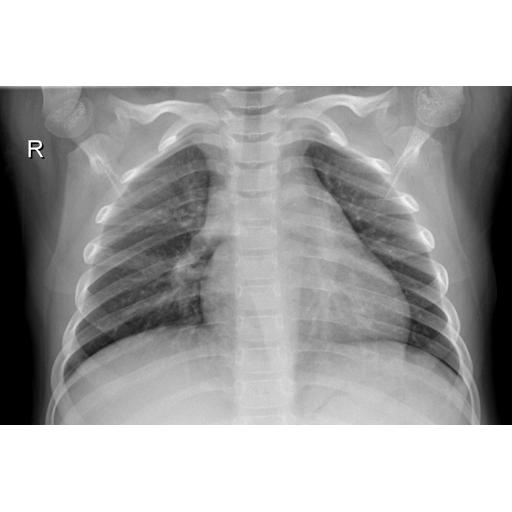

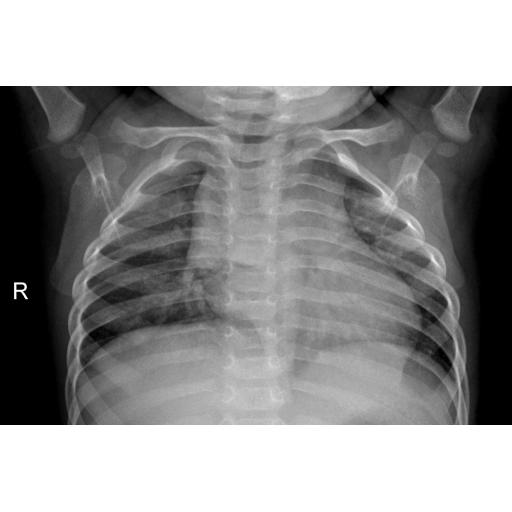

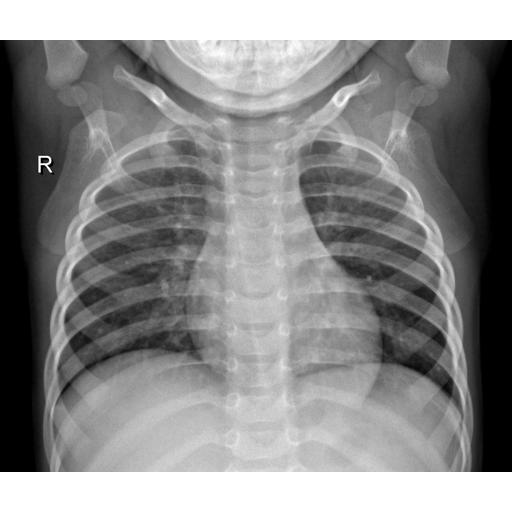

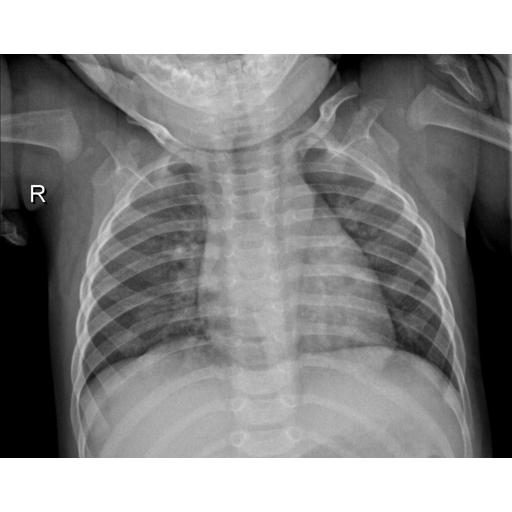

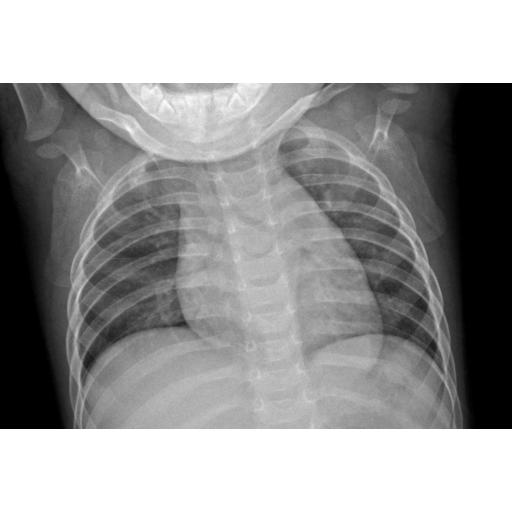

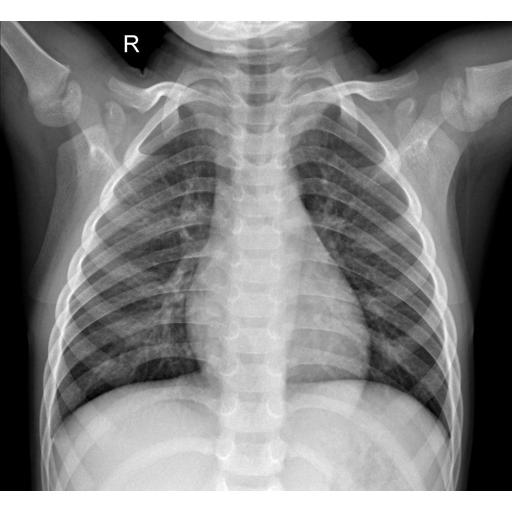

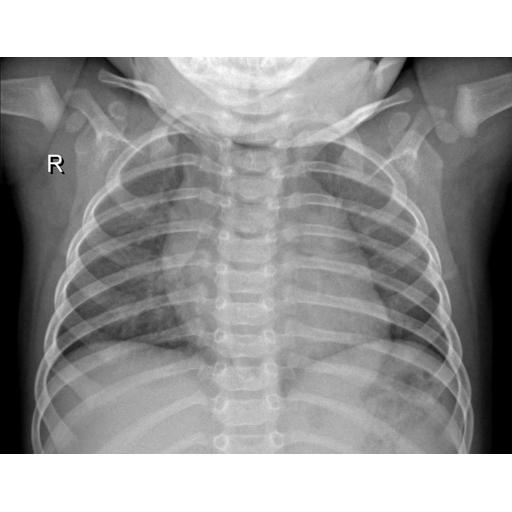

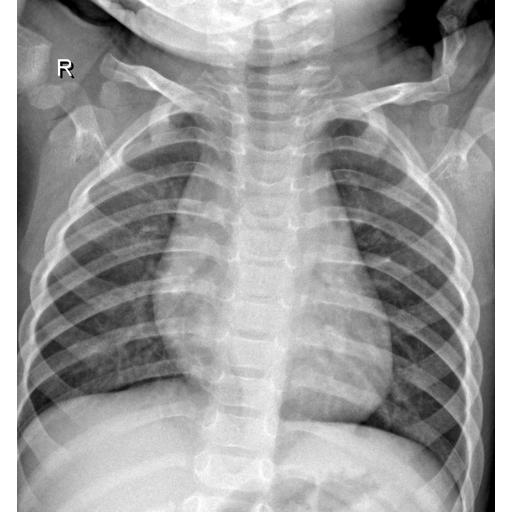

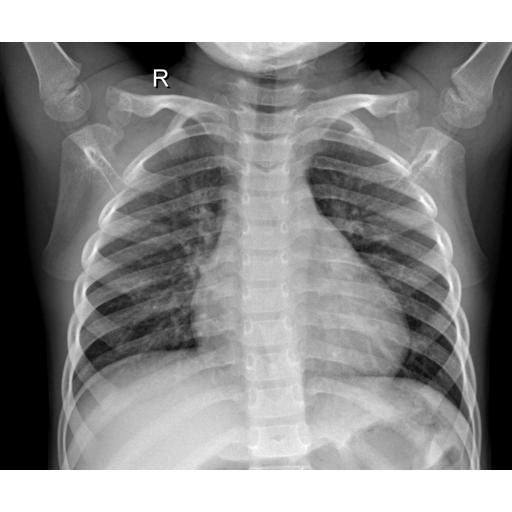

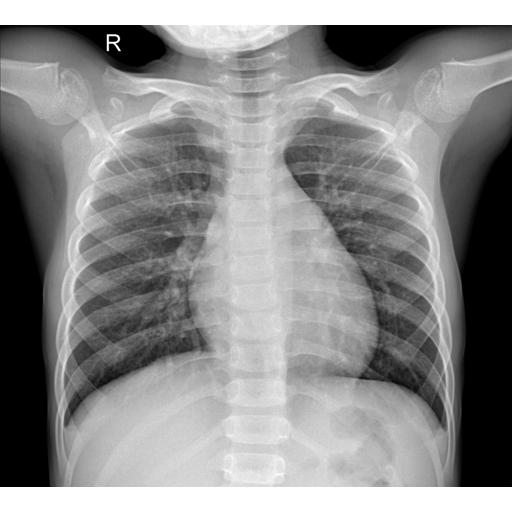

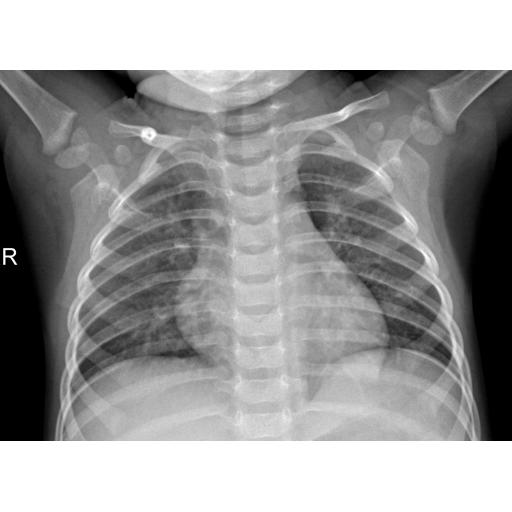

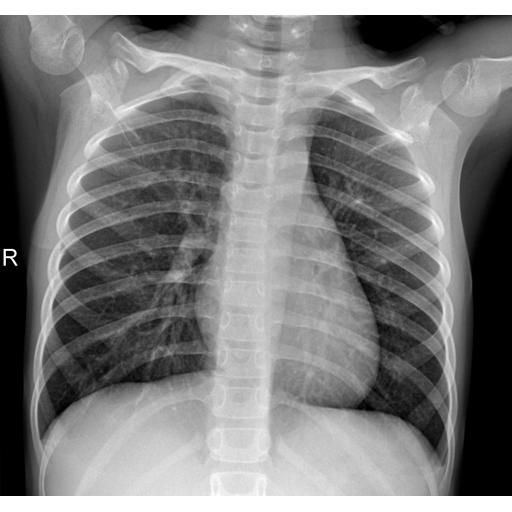

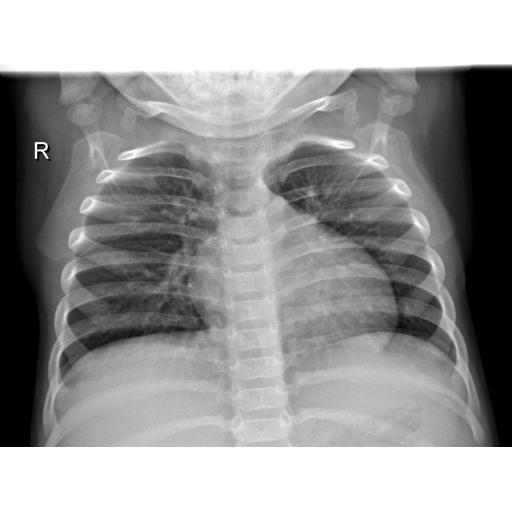

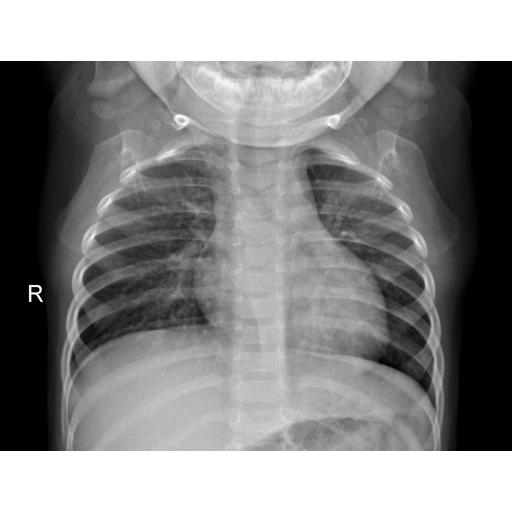

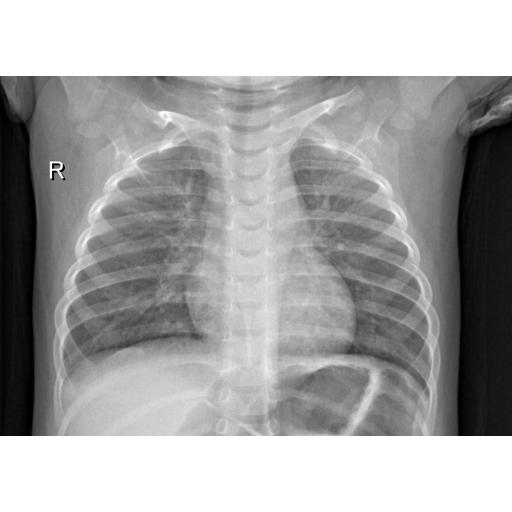

In [66]:
for i, img_byte_arr in enumerate(X_train['Image']):
    if i == 20:
        break
    img = Image.open(BytesIO(img_byte_arr))
    display(img)

In [67]:
for img_byte_arr in X_train['Image']:
    img = Image.open(BytesIO(img_byte_arr))
    print(img.mode, img.width, img.height)

L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
L 512 512
